# League of Legends Role Carry Potential Analysis

**Name(s)**: Ja-Chan Lu


**Website Link**: https://jachan056.github.io/LeagueDataAnalysis/

In [1]:
#!pip install kaleido

In [4]:
#!pip install plotly --upgrade

In [5]:
import pandas as pd
import numpy as np
from pathlib import Path

import kaleido as k
import plotly.express as px
pd.options.plotting.backend = 'plotly'
from tabulate import tabulate

#from dsc80_utils import * # Feel free to uncomment and use this.

# Set Up Step

League of Legends (LOL) Role Carry Potential Analysis is a data science project that includes various forms of data analysis including exploratory data analysis, Bivariate Analysis, hypothesis testing, and much more. The goal of this project is to determine which role has more carry potential between mid-laners and bot-laners, also known as ADC, and then determine how that ultimately affects the outcome of matches.

## Step 1: Introduction

The dataset this project explores is given by Oracle's Elixir which provides significant data on each match that took place in 2024. The dataset provides much insight on each match ranging from outcomes, to key statistics of individual players which help quantify the performance of each player and the team as a whole.

The term "carry potential" of a role is defined by the impact of that role's performance in the match which ultimately leads the team to victory. High carry potential means the role significantly impacted the outcome of the match, whereas low carry potential means the role's contribution to the outcome is not as significant.

The question I really want answered is which role out of the 5 roles given to teams in LOL have the most significant impact on the outcome of matches for their team. I will use various data analysis techniques to quantify their impact: Stats such as minion kills, damage done to other champions, number of kills, combat score (cs), etc. After answering which role has the most carry potential, I will use that data to build a prediction model to predict the outcome of numerous matches throughout the year, especially during big tournaments like Worlds (WLDs).

**Introduction to Columns**:
The dataset provides an extensive overview on game-related statistics on teams and players in their matches throughout the year. There are a total of 117,649 rows in the dataset and this is just a preview of some key columns included in the process of analysis. 

**gameid**: This column represents the specific matches played by players throughout the year. This allows for the separation of different matches played during 2024.

**teamname**: This column represents the unique identifier for each team participating in any match in the 2024 season.

**position**: This column represents the specific role played by each individual player in a match consisting of top-lane (top), mid-lane (mid), jungle (jng), support (sup), and bot-lane (ADC). 

**result**: This column represents the specific outcome of the match. 0 indicates that the player's team lost, while 1 indicates that the player's team won.

**K/D Ratio**: This column represents the kill death ratio of a player. The higher the ratio means the player kills more enemy players before dying, which contributes heavily to a team's success as more kills means the player can be further strengthened and perform even better. 

**assists**: This column represents the amount of times a player assisted/ contributed in the elimination of an enemy player without securing it themselves.

**damageshare**: This column represents the proportion in which the player contributes to team damage (How much % of the team's damage did the specific player deal throughout the match).

**damagetochampions**: This column represents the total damage a player inflicts to the enemy throughout the match, and high damage means significant contribution to team victory because high damage usually correlates with high elimination count. 

**total cs**: This column represents the count of how many minions a player has killed throughout the match. High CS means more experience and gold in which the gold can be spent on items to strengthen a player's ability to kill and increase experience points, which also strengthens a player. 

**earnedgold**: This column represents how much gold a player earned throughout the match and a higher count means the player is more likely able to purchase items in the shop that provide extra stats/abilities to increase their power and strength to kill enemies.

**Champion**: This column represents which champion each player chose to play during the match. 

## Step 2: Data Cleaning and Exploratory Data Analysis

1. Keep relevant columns: gameid, position, teamname, result, kills, deaths, assists, damagetochampions, total cs, and earnedgold. 

2. Dataframe has around 12 rows per match to keep track of the 10 players that played in the match and the last 2 rows to record the stats of the teams.

3. Further filter dataframe by keeping only the rows where their position is either mid or bot because I want to compare mid-laners and bot-laners (ADC). This means removing the last 2 rows of each match which keeps track of team stats as the only team-related stat that's needed is the result that determines a loss or victory in the match. The players also have 0 and 1 for whether they win/lose the match, so those can used instead.

4. Add new column: K/D ratio, by dividing the amount of kills and amount of deaths of each player. The higher the ratio, the better performing the player is because the player is eliminating more players than dying, which contributes heavily to the team's success. Eliminating more means the player gains more expereince points and gold which can be used to strenghten the character to perform even better. 

5. When calculating K/D ratios, some players that had 0 deaths resulted in infinity as the calculated kill-death ratio, which is impossible. To combat this, during the calculation process, instead of 0 deaths are replaced with 1 deaths to prevent any non-realistic values. The resulting ratio is also the same as the amount of kills the player got in the match. 

In [6]:
# Load dataset:
og = pd.read_csv('2024_LoL_esports_match_data_from_OraclesElixir.csv', low_memory=False)

In [7]:
# Code

# Load dataset
game = og

# Filter columns
game = game[['gameid', 'position', 'teamname', 'result', 'kills', 
                 'deaths', 'assists', 'damagetochampions', 'damageshare', 'total cs', 'earnedgold']]

# Keep only mid laners and ADC's
game = game[game['position'].isin(['mid', 'bot'])]

# Calculate K/D ratio for each player
game['K/D ratio'] = game['kills'] / (game['deaths'] + 1)

# Set index by gameid
game = game.set_index('gameid')
game

,position,teamname,result,kills,deaths,assists,damagetochampions,damageshare,total cs,earnedgold,K/D ratio
gameid,,,,,,,,,,,
10660-10660_game_1,mid,LNG Esports,0,0,2,0,10005,0.239355,270.0,6620,0.000000
10660-10660_game_1,bot,LNG Esports,0,2,4,0,10892,0.260563,311.0,8101,0.400000
10660-10660_game_1,mid,Rare Atom,1,4,0,7,14917,0.261963,329.0,10480,4.000000
10660-10660_game_1,bot,Rare Atom,1,7,1,5,19516,0.342725,303.0,10898,3.500000
10660-10660_game_2,mid,LNG Esports,0,1,4,2,11376,0.209038,219.0,5681,0.200000
...,...,...,...,...,...,...,...,...,...,...,...
LOLTMNT02_194400,bot,Dplus KIA,0,3,4,7,23442,0.302134,373.0,11548,0.600000
LOLTMNT02_194401,mid,Dplus KIA,0,6,4,5,33436,0.288199,329.0,11718,1.200000
LOLTMNT02_194401,bot,Dplus KIA,0,1,2,12,32761,0.282381,408.0,12415,0.333333


In [8]:
# head of dataset
game.head()

,position,teamname,result,kills,deaths,assists,damagetochampions,damageshare,total cs,earnedgold,K/D ratio
gameid,,,,,,,,,,,
10660-10660_game_1,mid,LNG Esports,0,0,2,0,10005,0.239355,270.0,6620,0.0
10660-10660_game_1,bot,LNG Esports,0,2,4,0,10892,0.260563,311.0,8101,0.4
10660-10660_game_1,mid,Rare Atom,1,4,0,7,14917,0.261963,329.0,10480,4.0
10660-10660_game_1,bot,Rare Atom,1,7,1,5,19516,0.342725,303.0,10898,3.5
10660-10660_game_2,mid,LNG Esports,0,1,4,2,11376,0.209038,219.0,5681,0.2


## Univariate Analysis

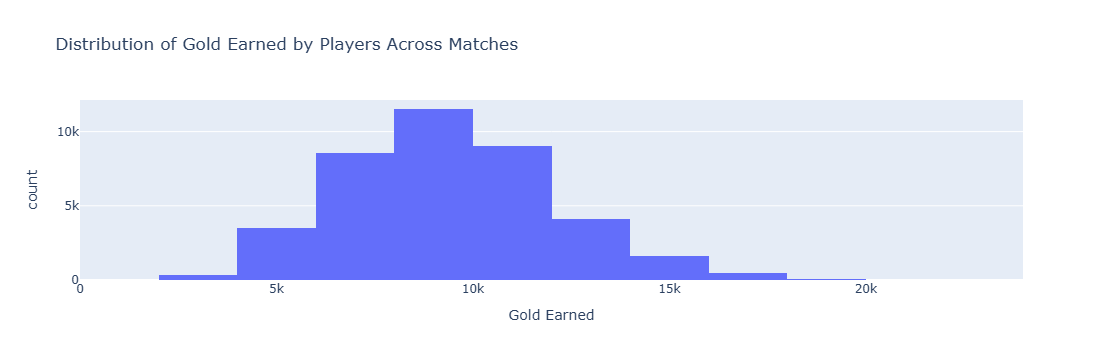

In [9]:
fig = px.histogram(game, x= 'earnedgold', nbins= 15,
                  title= 'Distribution of Gold Earned by Players Across Matches', 
                  labels = {'earnedgold': 'Gold Earned'})
fig.show()
fig.write_image("gold_distribution_plot.png")

**Earned gold column descriptions**:
The graph shows a relatively normal distribution based on its shape. The shape of the graph indicates a large cluster towards the bin between 5000 and 10,000 gold range which means most players in the 2024 season usually earn around 8000-9000 gold in their matches. 

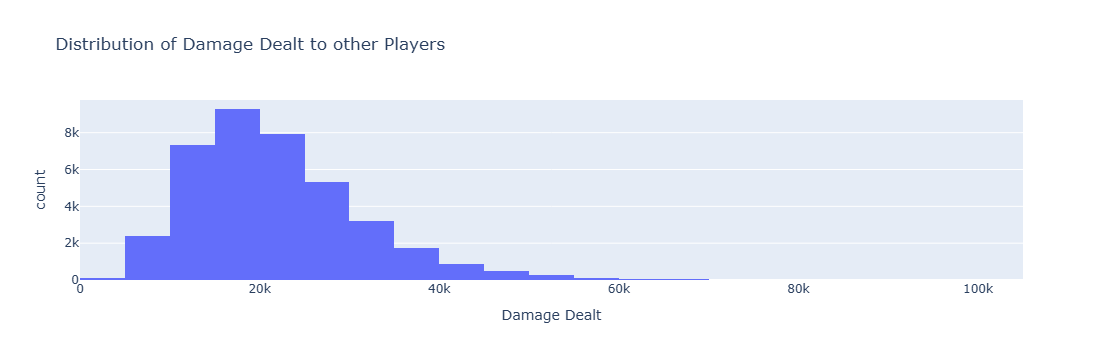

In [34]:
fig = px.histogram(game, x= 'damagetochampions', nbins= 25,
                  title= 'Distribution of Damage Dealt to other Players', 
                  labels = {'damagetochampions': 'Damage Dealt'})
fig.show()
fig.write_image("damage_distribution_plot.png")

**Damage Done to other champions graph**:
The graph is a right-skewed distribution, revealing that the average damage dealt by players is typically around the range of 20,000. There is an extreme outlier in the graph, which meant that a player was capable of doing over 100,000 damage in a single match!

## Bivariate Analysis

**Scatter Plot of damagetochampions and earnedgold:** 

The scatterplot is done to comapre the values of 2 columns (damagetochampions and earnedgold). Based on the graph shown, there is a strong positive lienar association, which means as ... increases, ... will increase as well.

The reason game[::10] is done which takes every 10 rows is because the entire dataframe has too many rows, which means too many points to graph, and ends up demanding a lot of memory and time to run the plot. I was able to reduce the amount of points to graph, without losing the linear association in the graph. 

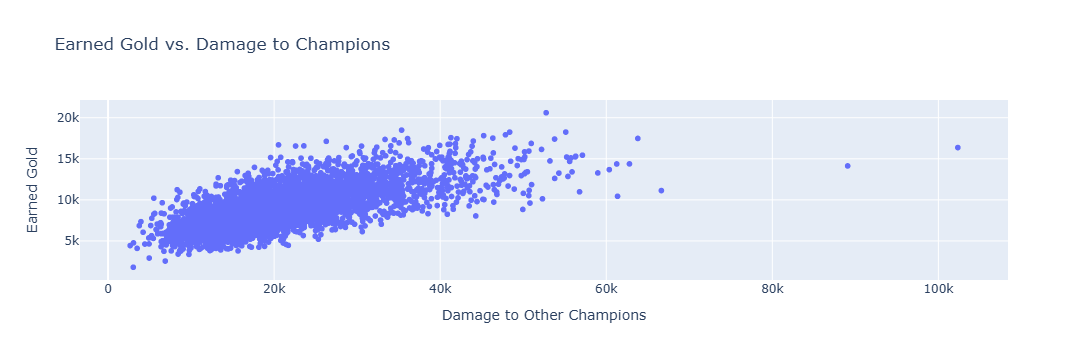

In [36]:
fig = px.scatter(
    data_frame= game[::10],
    x = 'damagetochampions',
    y = 'earnedgold',
    title= 'Earned Gold vs. Damage to Champions'
)
fig.update_layout(
    xaxis_title= 'Damage to Other Champions',
    yaxis_title= 'Earned Gold'
)
fig.show()
fig.write_image("gold_damage_plot.png")

**Plot for K/D ratio vs result column:**
In order to plot the K/D ratios and comapre them to the win/loss result of matches, the box plot was utilized to compare K/D ratios from players that win matches vs. players that lose matches. 

Based on the plot, the middle line of winning K/D ratios is way above the middle line in the box for losing K/D ratios: this suggests a significant difference in K/D ratios between players that lose/win matches. Players that win matches are going to have much higher K/D ratios than losing players, mostly because a higher K/D ratio contributes to strengthening a player, making them more likely to be able to beat the opposing players. 

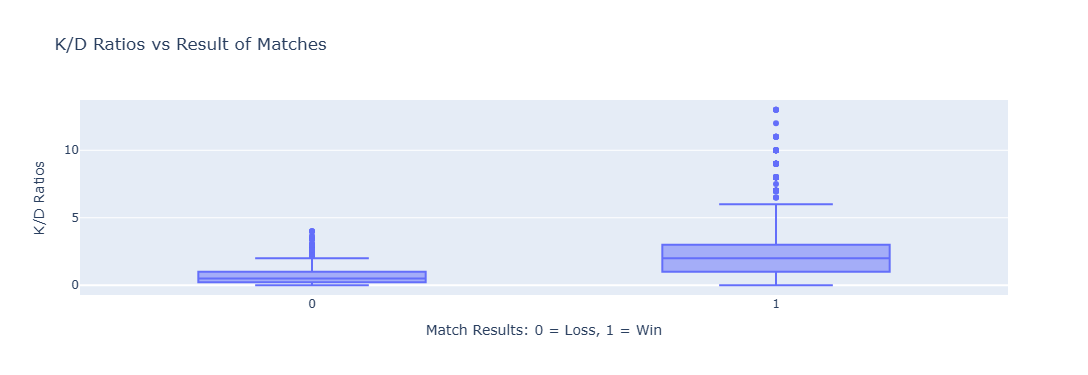

In [37]:
fig = px.box(
    data_frame= game[::10],
    x = 'result',
    y = 'K/D ratio',
    title= 'K/D Ratios vs Result of Matches'
)
fig.update_layout(
    xaxis_title= 'Match Results: 0 = Loss, 1 = Win',
    yaxis_title= 'K/D Ratios'
)
fig.show()
fig.write_image("kd_result_plot.png")

**Interesting Aggregates**:
First a copy of the dataframe is made so that edits and changes can be made to the dataframe to suit the aggregate without altering the main dataframe. The copy of the dataframe first drops the column, teamname, because the aggregate is needed to look at numerical stats. The team name does not have an effect on the individual player stats. We also drop the result column as the outcome of matches is not needed when looking at just indivdual performance and statistics. 

For the aggregate, the dataframe is grouped by position, then the mean function is applied to get the mean of the columns: K/D ratio, assists, damagetochampions, total cs, and earned gold for the mid-laner position and bot-laner/ADC position. The results show that on average, mid-laners have a much higher K/D ratio, which means they are doing more killing, whihc in turn contributes to both indivdual and team success. Mid-laners on average, lead in K/D ratios, assists, damage to champions, total cs, and earned gold. Mid-laners ultimately seem to be contributing more than the ADC position. 

In [13]:
df = game[::10].copy()
df = df.drop(['teamname', 'result'], axis= 1)

df = df.groupby('position').mean()
df

,kills,deaths,assists,damagetochampions,damageshare,total cs,earnedgold,K/D ratio
position,,,,,,,,
bot,3.800000,2.800000,5.400000,17734.200000,0.215082,246.600000,8067.000000,1.160000
mid,3.943579,2.705642,6.041358,21810.552974,0.270174,277.612714,9233.598417,1.572167


## Step 3: Assessment of Missingness

**NMAR Analysis**:
A column that could be NMAR would be the pentakill column which represents when a single player eliminates the entire enemy team by themself. The data is missing not at random due to the fact that no player during that match was able to achieve such a feat. Additionally, you can not use other columns to infer the amount of pentakills as no statistic is able to directly predict whether a player eliminated the entire enemy team by themself, making the column NMAR.  

**Missingness Dependency**: 
For missingness dependency I am going to test the missingness of the goldat25 column based on 2 different columns, match duration column and patch column. The significance level for the permutation tests are 0.05 and the test statistic used is the difference in means.

The first test is done on the goldat25 and match duration columns to test whether goldat25's missingness depends on gamelength (match duration) column. 

**Null Hypothesis:** The mean match duration is equal for matches with and without data for goldat25. 

**Alternative Hypothesis:** The mean match duration is longer for matches with data for goldat25.

In [14]:
# First, the dataframe is sliced to only include the columns needed for analysis: gamelength for match duration and goldat25.
df = og[['gamelength', 'goldat25']]

# Next, the calculations of the mean differences have to be done by filtering 2 different dataframes (1 where goldat25 has no recorded data and 1 where goldat25 has recorded data). 
nogold = df[df['goldat25'].isna()] 
hasgold = df[df['goldat25'].notna()] 
 
obs_mean_diff = hasgold['gamelength'].mean() - nogold['gamelength'].mean()
lst_gamelen = []
for i in range(500):
    shuffle = np.random.permutation(df['gamelength'].values)
    shuffledf = df.copy()
    shuffledf['gamelength'] = shuffle
    shuffleno = shuffledf[shuffledf['goldat25'].isna()]
    shuffleyes = shuffledf[shuffledf['goldat25'].notna()]
    testmean = shuffleyes['gamelength'].mean() - shuffleno['gamelength'].mean()
    lst_gamelen.append(float(testmean))
p_val = (lst_gamelen >= obs_mean_diff).mean()
p_val

np.float64(0.0)

The observed mean difference was calculated to be approximately 179.98. The p-value is derived to be 0 after conducting the permutation tests. The empirical distribution of the test statistic and observed statistic during the permutation testing resulted in such a plot:

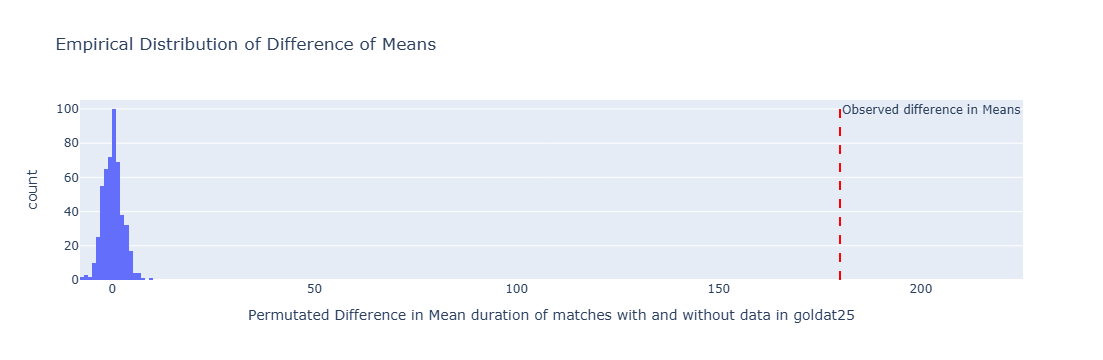

In [40]:
fig = px.histogram(
    x= lst_gamelen,  
    nbins= 30,
    title='Empirical Distribution of Difference of Means',
    labels={'x': 'Permutated Difference in Mean duration of matches with and without data in goldat25'}
)

fig.add_vline(
    x=obs_mean_diff,
    line_dash="dash",
    line_color="red",
    annotation_text= 'Observed difference in Means',
    annotation_position="top right"
)

fig.show()
fig.write_image("goldat25_distribution_plot.png")

Since the p-value was way less than 0.05, the original signifiance level, we can reject the null hypothesis. Thus, this indicates that the missingness in goldat25 column depends on the gamelength (match duration) column. 

**Hyp 2: Does missingness in the goldat25 column depend on result column?**
The second test is done on the goldat25 and result column to test whether goldat25's missingness depends on the result of a match (win/lose) (result) column. 

**Null Hypothesis**: There is an equal distribution for amount of wins/losses for matches with and without data for goldat25. 

**Alternative Hypothesis**: Values in goldat25 are more likely to be recorded for 

In [16]:
# First, the dataframe is sliced to only include the columns needed for analysis: result column and goldat25 column.
df2 = og[['result', 'goldat25']]

# Next, the calculations of the mean differences have to be done by filtering 2 different dataframes (1 where the match was won and 0 where the match was loss). 
loss = df2[df2['goldat25'].isna()]
win = df2[df2['goldat25'].notna()] 
 
obs_mean_diff_result = win['result'].mean() - loss['result'].mean()
lst = []
for i in range(500):
    shuffle = np.random.permutation(df2['result'].values)
    shuffledf = df.copy()
    shuffledf['result'] = shuffle
    shuffleloss = shuffledf[shuffledf['goldat25'].isna()]
    shufflewin = shuffledf[shuffledf['goldat25'].notna()]
    testmean = shufflewin['result'].mean() - shuffleloss['result'].mean()
    lst.append(float(testmean))
p_val = (lst >= obs_mean_diff_result).mean()
p_val

np.float64(0.488)

The observed mean difference was calculated to be approximately 0.00051. The p-value is derived to be 0.444 after conducting the permutation tests. The empirical distribution of the test statistic and observed statistic during the permutation testing resulted in such a plot:

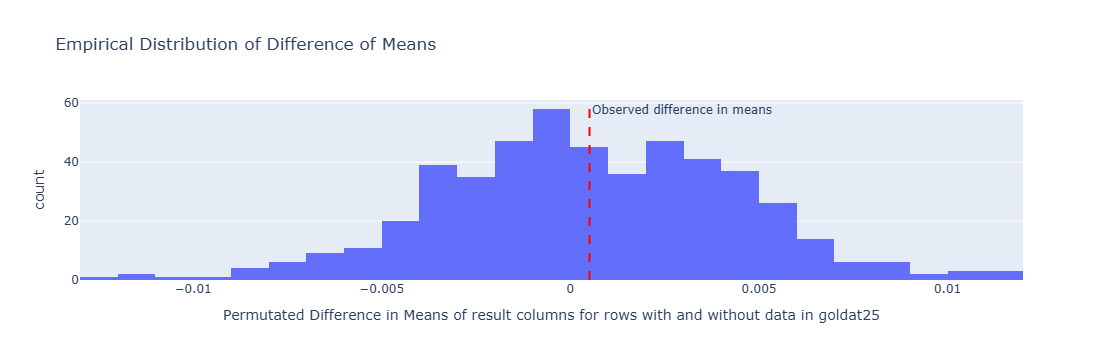

In [41]:
fig = px.histogram(
    x= lst,  
    nbins= 30,
    title='Empirical Distribution of Difference of Means',
    labels={'x': 'Permutated Difference in Means of result columns for rows with and without data in goldat25'}
)

fig.add_vline(
    x=obs_mean_diff_result,
    line_dash="dash",
    line_color="red",
    annotation_text= 'Observed difference in means',
    annotation_position="top right"
)

fig.show()
fig.write_image("goldat25_result_plot.png")

Since the p-value was way more than 0.05, the original signifiance level, we fail to reject the null hypothesis. Thus, this indicates that the missingness in goldat25 column does not depend on the result column (whether the match was won or lost). 

## Step 4: Hypothesis Testing

**Hypothesis Testing**:
In the hypothesis test, I want to determine if there is a significant difference between the probabilities of mid-laners having the highest damageshare in their match or bot-laners having the highest damageshare in their match. This is important in answering the overall research question because finding out which position has a the higher damageshare allows us to use the damageshares of that position and then predict whether a team wins or loses based on the performance of their mid-laner in the match.  

**Null Hypothesis:** There is an equal probability for mid-laners/bot-laners achieving the highest damage share in their match. 

**Alternative Hypothesis:** There is an unequal probability for mid-laners/bot-laners achieving the highest damage share in their match meaning 1 position has the more favorable probability over the other. 

**Test Statistic:** Absolute mean difference between mid-laners having higher damage shares and bot-laners having damage shares. 

**Significance Level:** 5%

In [18]:
hypdf = game[['position', 'damageshare', 'result']]

# Get the damage share proportions of mid laners and bot laners into 2 seperate arrays
mid_dmgshare = hypdf[hypdf['position'] == 'mid']
mid_dmgshare = mid_dmgshare['damageshare'].to_numpy()
bot_dmgshare = hypdf[hypdf['position'] == 'bot']
bot_dmgshare = bot_dmgshare['damageshare'].to_numpy()

# Absolute observed mean difference between average damage shares of ADC and mid laners. 
obs =  abs(bot_dmgshare.mean() - mid_dmgshare.mean())

# Permutation Testing Process:
arr = np.array([])
arr2 = np.array([])
arr = np.append(arr, bot_dmgshare)
arr = np.append(arr, mid_dmgshare)
for i in range(10000):
    np.random.shuffle(arr)
    bot = arr[:len(bot_dmgshare)]
    mid = arr[len(bot_dmgshare):]
    diff = abs(bot.mean() - mid.mean())
    arr2 = np.append(arr2, diff)

(arr2 >= obs).mean()

np.float64(0.0003)

The level of significance chosen was 0.05, and the p-value ended up being 0.0008 which was way below the level of significance. This means that the null hypothesis can be rejected, therefore bot-laners have a higher probability of getting a higher damage share in a given match compared to mid-laners. This means that to predict which team wins a given match, the bot-laner position should be looked at, especially their damange share statistic.

## Step 5: Framing a Prediction Problem

Previously, it was determined that the bot-laners have the highest carry potential due to their tendency to be the highest damage share out of all the positions in the game. With this in mind, would it be possible to predict whether a team wins or loses a match based on the damage share proportion and other statistics of their bot-laner? This is going to be a classification problem, utilizing a binary classification where 1 means the team won, and 0 means the team lost. The response variable that is being predicted is the values in result where 1 = win match and 0 = lose match. 

The reason why the variable was chosen was because the model was meant to predict the result of the match, meaning the values in result does the job perfectly. It's very simple as well having only 2 disctinct values to represent a win or loss. The result column consistently records data because every possible match always has an end result. 

To measure the success of the model, the metric utilized would be accuracy because of the relatively even distribution of wins and losses. Had the result column had an imbalanced win percentage instead of an even 50/50 split of wins and losses, the f1-score model would have been superior for the lack of balance in the model. 

During the initial model, the variables utilized to build the model will include damage share and K/D ratio. These variables are spefically picked because they evaluate the performance of a player in a match well, and these statistics are also representative of a winning/losing player based on its magnitude. Additionally, no encoding is required on the columns as the data being utilized are all quantitative data.   

## Step 6: Baseline Model

In the baseline model, a binary classifier is utilized along with 2 features (damage share and K/D ratio of individual bot-laners). Both of these features are considered quantitative data. The StandardScaler Transformer was utilized in order to transform the features into standard scale, which allows for the data to be considered/utilized on the same scale. 

When fitting the model, it resulted in many numbers between 0 and 1, which was supposed to represent the win/loss result. To combat this, a 0.5 margin was drawn on the data, meaning that all predicted values above 0.5 counted as a win while values below 0.5 counted as a loss. After fitting the model, the accuracy score came out to be 0.7988, which meant the 79.88% of the data was correctly predicted by the model.

In order to improve the accuracy on the model, some additional measures will be taken such as adding a train-test split, additional features, and much more. 

In [19]:
game[game['position'] == 'bot']

,position,teamname,result,kills,deaths,assists,damagetochampions,damageshare,total cs,earnedgold,K/D ratio
gameid,,,,,,,,,,,
10660-10660_game_1,bot,LNG Esports,0,2,4,0,10892,0.260563,311.0,8101,0.400000
10660-10660_game_1,bot,Rare Atom,1,7,1,5,19516,0.342725,303.0,10898,3.500000
10660-10660_game_2,bot,LNG Esports,0,0,2,2,16509,0.303354,50.0,4296,0.000000
10660-10660_game_2,bot,Rare Atom,1,4,0,5,13767,0.218886,340.0,11135,4.000000
10660-10660_game_3,bot,LNG Esports,1,3,0,4,12517,0.206441,230.0,8555,3.000000
...,...,...,...,...,...,...,...,...,...,...,...
LOLTMNT02_193448,bot,OKSavingsBank BRION,0,3,5,4,13891,0.248226,248.0,6958,0.500000
LOLTMNT02_194400,bot,OKSavingsBank BRION,1,6,3,13,20398,0.210514,335.0,11675,1.500000
LOLTMNT02_194400,bot,Dplus KIA,0,3,4,7,23442,0.302134,373.0,11548,0.600000


In [20]:
# Baseline Model
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score

df = game[game['position'] == 'bot']
x = df[['damageshare', 'K/D ratio']]
y = df['result']
pipeline = Pipeline([
    ('standardize', StandardScaler()),
    ('linear', LinearRegression())
])
pipeline.fit(x, y)

Pipeline(steps=[('standardize', StandardScaler()),
                ('linear', LinearRegression())])

In [21]:
predict = pipeline.predict(x)
predict

array([0.30250121, 0.64922009, 0.21514074, ..., 0.29591614, 0.27621736,
       1.03731578])

In [22]:
binary_pred = (predict >= 0.5).astype(int)
binary_pred

array([0, 1, 0, ..., 0, 0, 1])

In [23]:
accuracy_score(y, binary_pred)
# 78.49% of predictions were correct based on the accuracy score given. 

0.7848837209302325

## Step 7: Final Model

**Feature to add:** 

*propgoldfromelims*: Accoridng to Google, 1 CS point is worth on average, 19-27 gold, so finding the average, the assumption of gold per cs the data utilizes will be 23 gold. The result gives us a proportion in which the gold was earned from non-cs related eliminations (mainly player eliminations).

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV  

df = df[df['position'] == 'bot']
#df = game.drop('K/D ratio', axis= 1)
goldcs = 23
df['goldfromelims'] = (df['earnedgold'] - (df['total cs'] * goldcs)) / (df['earnedgold'] + 1)

# KDA Ratio: Includes assists as well to better account for contribution in team eliminations. 
df['KDA Ratios'] = (df['kills'] + df['assists']) / (df['deaths'] + 1)


x = df[['damageshare', 'KDA Ratios', 'goldfromelims']]
y = df['result']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state = 24)

# Pipeline
pl = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(criterion='entropy', random_state= 24))
])
pl

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=24))])

In [25]:
hyperparameters = {
    'classifier__max_depth': [2, 4, 8]
}

kfolds = KFold(5, shuffle= True)
grids = GridSearchCV(pl, param_grid= hyperparameters, cv= kfolds)
grids.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               random_state=24))]),
             param_grid={'classifier__max_depth': [2, 4, 8]})

In [26]:
grid_df = pd.DataFrame(grids.cv_results_)
finaldf = grid_df.sort_values(by= 'mean_test_score', ascending= False)
finaldf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.036450,0.002109,0.002164,0.000070,8,{'classifier__max_depth': 8},0.879674,0.885753,0.874192,0.884393,0.896634,0.884129,0.007452,1
1,0.022799,0.001055,0.002426,0.000447,4,{'classifier__max_depth': 4},0.879334,0.882013,0.880653,0.883033,0.890513,0.883109,0.003907,2
0,0.017444,0.006371,0.002471,0.001080,2,{'classifier__max_depth': 2},0.871176,0.878273,0.877593,0.880313,0.888473,0.879166,0.005569,3


In [27]:
best_estimator = grids.best_estimator_
best_estimator

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        random_state=24))])

In [28]:
featuresImportance = best_estimator.named_steps['classifier'].feature_importances_
featuresImportance

array([0.04997758, 0.86421129, 0.08581113])

In [29]:
feature_df = pd.DataFrame()
feature_df['Feature'] = x.columns
feature_df['Feature_Importance'] = featuresImportance
feature_df.sort_values('Feature_Importance', ascending=False)

,Feature,Feature_Importance
1,KDA Ratios,0.864211
2,goldfromelims,0.085811
0,damageshare,0.049978


In [30]:
# Build model now by using KDA Ratios, gold from elims, and damageshare. K/D Ratio is insignificant and can be dropped
improved_x = df[['damageshare', 'KDA Ratios', 'goldfromelims']]
y = df['result']
improved_x_train, improved_x_test, improved_y_train, improved_y_test = train_test_split(improved_x, y, test_size= 0.25, random_state = 24)
new_pl = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(criterion='entropy', random_state= 24))
])
new_pl

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=24))])

In [31]:
hyperparameters = {
    'classifier__max_depth': [2, 4, 8]
}

kfolds = KFold(5, shuffle= True)
new_grids = GridSearchCV(new_pl, param_grid= hyperparameters, cv= kfolds)
new_grids.fit(x_train, y_train)
new_grids.score(x_train, y_train)
# The new accuracy is 90.32% compared to the baseline model which was 78.49%.

0.9032367741058072

The model utilized for the final model was the DecisionTreeClassifier for the existence of nonlinear relationships and validated the model through KFold Cross-validation. In the case of tuning hyperparameters, I utilized max depth and found that the optimal max depth to use was 8. In doing so, the highest mean_test_score which represented the cross-validation accuracy came back to 88.5%. Utilizing all that was known, and utilizing the features KDA Ratio, damageshare, and goldfromelims, the new model's accuracy came back to 88.4%, which was an improvement, meaning the model was better at predicting the wins/losses. 

## Step 8: Fairness Analysis

**Question to Answer:** Does my model perform worse for players who play ADC Yasuo than it does for players who do not play ADC Yasuo?

**Null Hypothesis:** Our model is fair. Precision is roughly the same for players that play or do not play Yasuo in bot-lane. 

**Alternative Hypothesis:** Model is unfair. Precision is higher for players that play Yasuo in bot-lane. 

**Test Statistic:** Difference in accuracy between players that did play Yasuo and players who did not

In [32]:
# Fairness Analysis:
from sklearn.metrics import precision_score

fresh_df = og.copy()
fresh_df = fresh_df[fresh_df['position'] == 'bot']
goldcs = 23
fresh_df['goldfromelims'] = (fresh_df['earnedgold'] - (fresh_df['total cs'] * goldcs)) / (fresh_df['earnedgold'] + 1)
fresh_df['KDA Ratios'] = (fresh_df['kills'] + fresh_df['assists']) / (fresh_df['deaths'] + 1)
fresh_df = fresh_df.set_index('gameid')

# Create dataframe with only players that play Yasuo
yasdf = fresh_df[fresh_df['champion'] == 'Yasuo']

# Create dataframe with only players that do not play Yasuo
notyasdf = fresh_df[fresh_df['champion'] != 'Yasuo']

# Predictions on yasdf and notyasdf
yasuo_x = yasdf[['damageshare', 'KDA Ratios', 'goldfromelims']]
notyasuo_x = notyasdf[['damageshare', 'KDA Ratios', 'goldfromelims']]
yasuo_y = yasdf['result']
notyasuo_y = notyasdf['result']
score_yas = precision_score(yasuo_y, best_estimator.predict(yasuo_x))
score_noyas = precision_score(notyasuo_y, best_estimator.predict(notyasuo_x))
difference_yasuo = score_yas - score_noyas
difference_yasuo

np.float64(0.10912558980022091)

In [33]:
permutations = []
for i in range(250):
    combinedf = pd.concat([yasdf, notyasdf])
    combinedf['champion'] = np.random.permutation(combinedf['champion'])
    yasdf = combinedf[combinedf['champion'] == 'Yasuo']
    notyasdf = combinedf[combinedf['champion'] != 'Yasuo']
    sim_yasuo_x = yasdf[['damageshare', 'KDA Ratios', 'goldfromelims']]
    sim_notyasuo_x = notyasdf[['damageshare', 'KDA Ratios', 'goldfromelims']]
    sim_yasuo_y = yasdf['result']
    sim_notyasuo_y = notyasdf['result']
    sim_score_yas = precision_score(sim_yasuo_y, best_estimator.predict(sim_yasuo_x))
    sim_score_noyas = precision_score(sim_notyasuo_y, best_estimator.predict(sim_notyasuo_x))
    sim_difference_yasuo = sim_score_yas - sim_score_noyas
    permutations.append(sim_difference_yasuo)
p_value = np.mean(permutations >= difference_yasuo)
p_value

np.float64(0.212)

The p-value of the model ended up being 0.3 meaning we fail to reject the null hypothesis. Therefore, the model is considered fair and precision levels are similar for bot-lane players regardless of whether or not they play Yasuo.